# Support Vector Machine For 2-class Linear Separable Question

## Decision Boundary

for the positive class: $$w^TX + b \geq 0$$
for the negative class: $$w^TX + b < 0$$

Problem? There many solutions, and which one should be chosen?

## Idea of SVM

Core Idea: Find the decision boundary, while maximize the <b>margin</b>

Then it will have two boundary, upper boundary and lower boundary

for the upper boundary: $$w^TX+b \geq 1$$
for the lower boundary: $$w^TX+b < 1$$
They can be merged into one: $$(w^TX+b)^TY \geq 1$$

Then, we have three areas. The negative class is below or on the lower boundary, whereas the positive class is higher or on the upper boundary. And there is an area without any samples (this area should be maximize). The samples on the boundary are called <b>support vector</b>

## The Distance Between Two Planes/Lines

The distance between the marginal boundary and the decision boundary: $$\frac{|b-(b-1)|}{\sqrt{||w||^2}} = \frac{1}{||w||}$$
The distance between the margins: $$\frac{2}{||w||}$$
maximize the above <==> minimize the following: $$\frac{1}{2}||w||^2$$

## Task
What we want to do now is finding a decision boundary which owns the largest distance of margins:
$$min_{w} \frac{1}{2}||w||^2 \ subject \ to \ (w^TX+b)^TY \geq 1$$

## Derivative Task by "Lagrange Multiplier"

Minimize:
$$\ell(w,b,a)=\frac{1}{2}||w||^2 - \sum_i a_i(y_i(w^Tx_i+b)-1)$$

Solve:
$$\frac{\partial \ell(w,b,a)}{\partial w}=0 \to w = \sum_i^l a_iy_ix_i, \ x_i \in {SV}$$

$l$ is the number of support vectors (note: sometimes, you may see $n$ instead of $l$, because $a_i=0$ for the samples not on the marginal boundaries)

$a_i$ is the lagrange multipliers

## VC Dimension and Bounding True Error

VC dimension: https://www.zhihu.com/question/23418822

VC for SVC: $$h\leq min(\frac{R^2}{\rho^2},p)+1$$

Bounding True Error: silde 31,week4_a, TU Delft CS4220

## Error Estimation

By leave-one-out cross validation, the true error can be bounded by: $\varepsilon_{LOO} \le \frac{\# support \ vectors}{N}$

# for Linear Nonseparable Question

## Adding Slack
<img src="./week4_figure/outlier1.png" width="75%">

<br>For linear separable one: $$(w^TX+b)^TY \geq 1$$

<br>We can make the marginal boundaries more flexible for <b>some of the points</b>: $$(w^Tx_i+b)^Ty_i \geq 1-\xi_i,\ i={1,2,...n}$$

or

$$(w^TX+b)^TY \geq 1-\xi$$

<br>slack variable $\xi$:</br>
* large slack variable like (a), $\xi_i \ge 1$
* small slack variable like (b), $1 > \xi_i > 0$
* no slack variable for the correct points, $\xi_i = 0$
* 软误差(sum of the slack variable. they can be ragarded as a kind of error, as we ingore/misclassify them in order to build our margianl boundaries), $\sum_i^n \xi$
* panalty, C to constarin the slack

<br> new model: 
$$
min \frac{1}{2}||w||^2+C\sum_i^n \xi_i
\\
s.t. (w^TX+b)^TY \geq 1-\xi
\\
\xi_i \ge 0, \ for i={1,2,...,n}
$$

<br> new optimization problem:
$$
max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
\\
s.t. 0 \le \alpha_i \le C
\\
\sum_{j=1}^m \alpha_i y_i =0
$$

$$\to f(X) = w^TX+b = (\sum_{i=1}^n a_iy_ix_i)^TX + b$$

<br>reference: https://blog.csdn.net/guoziqing506/article/details/81120354

## Mapping To A Higher Dimenssion

![avator](./week4_figure/projection.gif)

## Kernal Function



$$
max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
\\
s.t. 0 \le \alpha_i \le C
\\
\sum_{j=1}^m \alpha_i y_i =0
$$

$$
f(z) = \sum_{i=1}^n a_iy_iK(x_i,z) + b
$$

<br> brilliant video provided by MIT: </br>
<br>https://www.youtube.com/watch?v=_PwhiWxHK8o&ab_channel=MITOpenCourseWare

# Exercise

In [1]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

## exercise 4.1

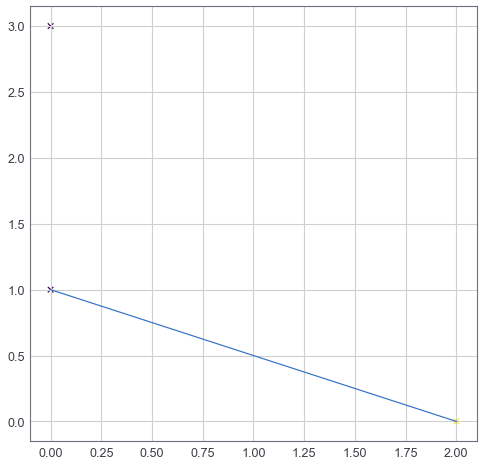

In [2]:
plt.figure(figsize=(8,8))
x = np.array([[0,1], [0,3], [2,0]])
y = np.array([0, 0, 1])
plt.scatter(x[:,0], x[:,1], c=y, marker="x")
plt.plot([2,0], [0,1])
plt.show()

(a)

totally 2 support vectors on the margins

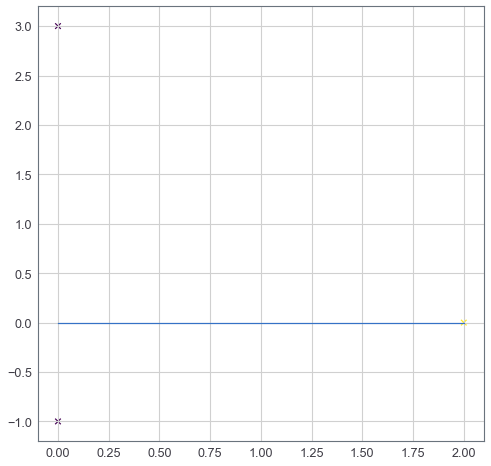

In [3]:
plt.figure(figsize=(8,8))
x = np.array([[0,-1], [0,3], [2,0]])
y = np.array([0, 0, 1])
plt.scatter(x[:,0], x[:,1], c=y, marker="x")
plt.plot([2,0], [0,0])
plt.show()

(b)

totally 3 support vectors on the margins

## Exercise 4.2

In [4]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import maxabs_scale
from sklearn.preprocessing import normalize

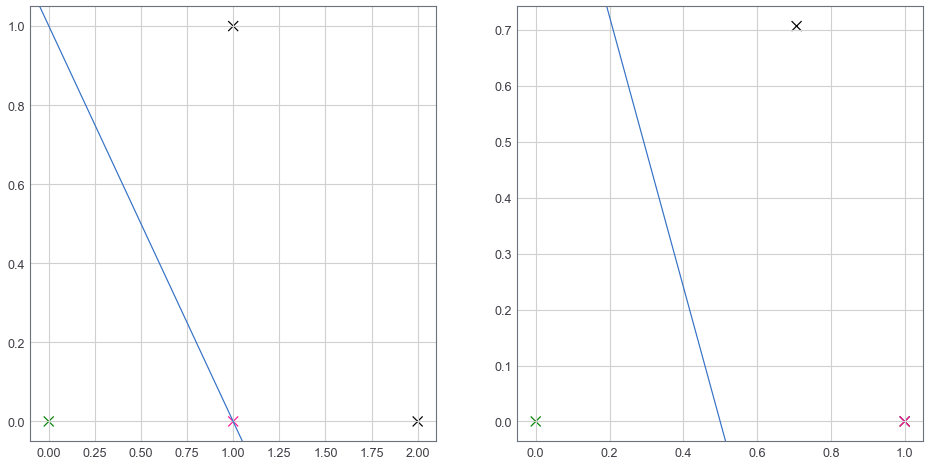

In [5]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
x = np.array([[1,1], [2,0], [0,0], [1,0]])
y = np.array([0, 0, 1, 2])
plt.scatter(x[:,0], x[:,1], c=["black", "black", "green", "#ff1493"], marker="x", s=100)
train = pr.prdataset(x[:3], y[:3])
c = pr.svc(train, ("linear", 0, 20))
pr.plotc(c)

plt.subplot(1,2,2)
x_rescale = normalize(x)
plt.scatter(x_rescale[:,0], x_rescale[:,1], c=["black", "black", "green", "#ff1493"], marker="x", s=100)
train_re = pr.prdataset(x_rescale[:3], y[:3])
c = pr.svc(train_re, ("linear", 0, 20))
pr.plotc(c)

plt.show()

(a)
??????

Is it noly sensitive to the non-linear scaling?

## Exercise 4.3

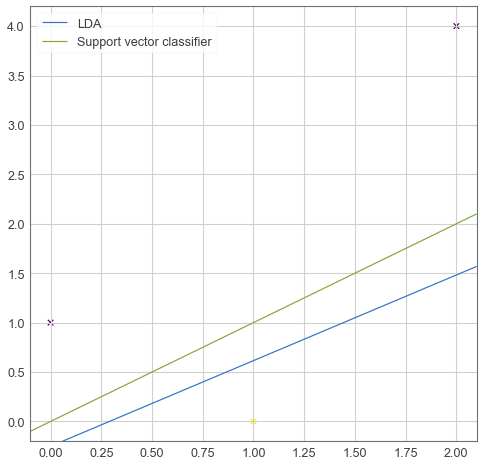

In [6]:
plt.figure(figsize=(8,8))
x = np.array([[0,1], [2,4], [1,0]])
y = np.array([0, 0, 1])
data = pr.prdataset(x, y)
w = pr.ldc(data, 1)
w2 = pr.svc(data,("linear", 0, 10))
plt.scatter(x[:,0], x[:,1], c=y, marker="x")
pr.plotc(w)
pr.plotc(w2)
plt.legend()
plt.show()

(a)
?????

The two solutions will be the same when <b>the number of support vectors is three in the 2D case.</b> LDA will always have three “support vectors” in this 2D setting

## Exercise 4.4

## Exercise 4.5

(a)

$$exp(-(x-y)^2)=exp(-x^2)exp(-y^2)exp(2xy)=exp(-x^2)exp(-y^2)\sum \frac{(2xy)^n}{n!}$$

$$\phi(x)=exp(-x)\sum \frac{\sqrt{2}x^n}{n!}$$

$$\phi(y)=exp(-y)\sum \frac{\sqrt{2}y^n}{n!}$$

(b)

$\infty$

## Exercise 4.6

(a)
$$||x - \frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C||^2 
= 
<x- \frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C, 
x- \frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C>$$

(b)
$$
<x- \frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C, 
x- \frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C> 
\\
= x^2 - \frac{2}{N_C} \sum_{x_i^C \in N_C} x_i^C x + \frac{1}{N_C^2} \sum_{x_i^C \in N_C} \sum_{x_j^C \in N_C} x_i^C x_j^C
$$

$$
\frac
{x^2 - \frac{2}{N_C} \sum_{x_i^C \in N_C} x_i^C x + \frac{1}{N_C^2} \sum_{x_i^C \in N_C} \sum_{x_j^C \in N_C} x_i^C x_j^C}
{x^2 - \frac{2}{N_K} \sum_{x_i^K \in N_K} x_i^K x + \frac{1}{N_K^2} \sum_{x_i^K \in N_K} \sum_{x_j^K \in N_K} x_i^K x_j^K}=1
$$


$$
\frac{1}{N_C} \sum_{x_i^C \in N_C} x_i^C x - 
\frac{1}{N_K} \sum_{x_i^K \in N_K} x_i^K x = c
$$

$$
\frac{1}{N_C} \sum_{x_i^C \in N_C} K(x, x_i^C) - 
\frac{1}{N_K} \sum_{x_i^K \in N_K} K(x, x_i^K) = c
$$

## Exercise 4.7

(a)

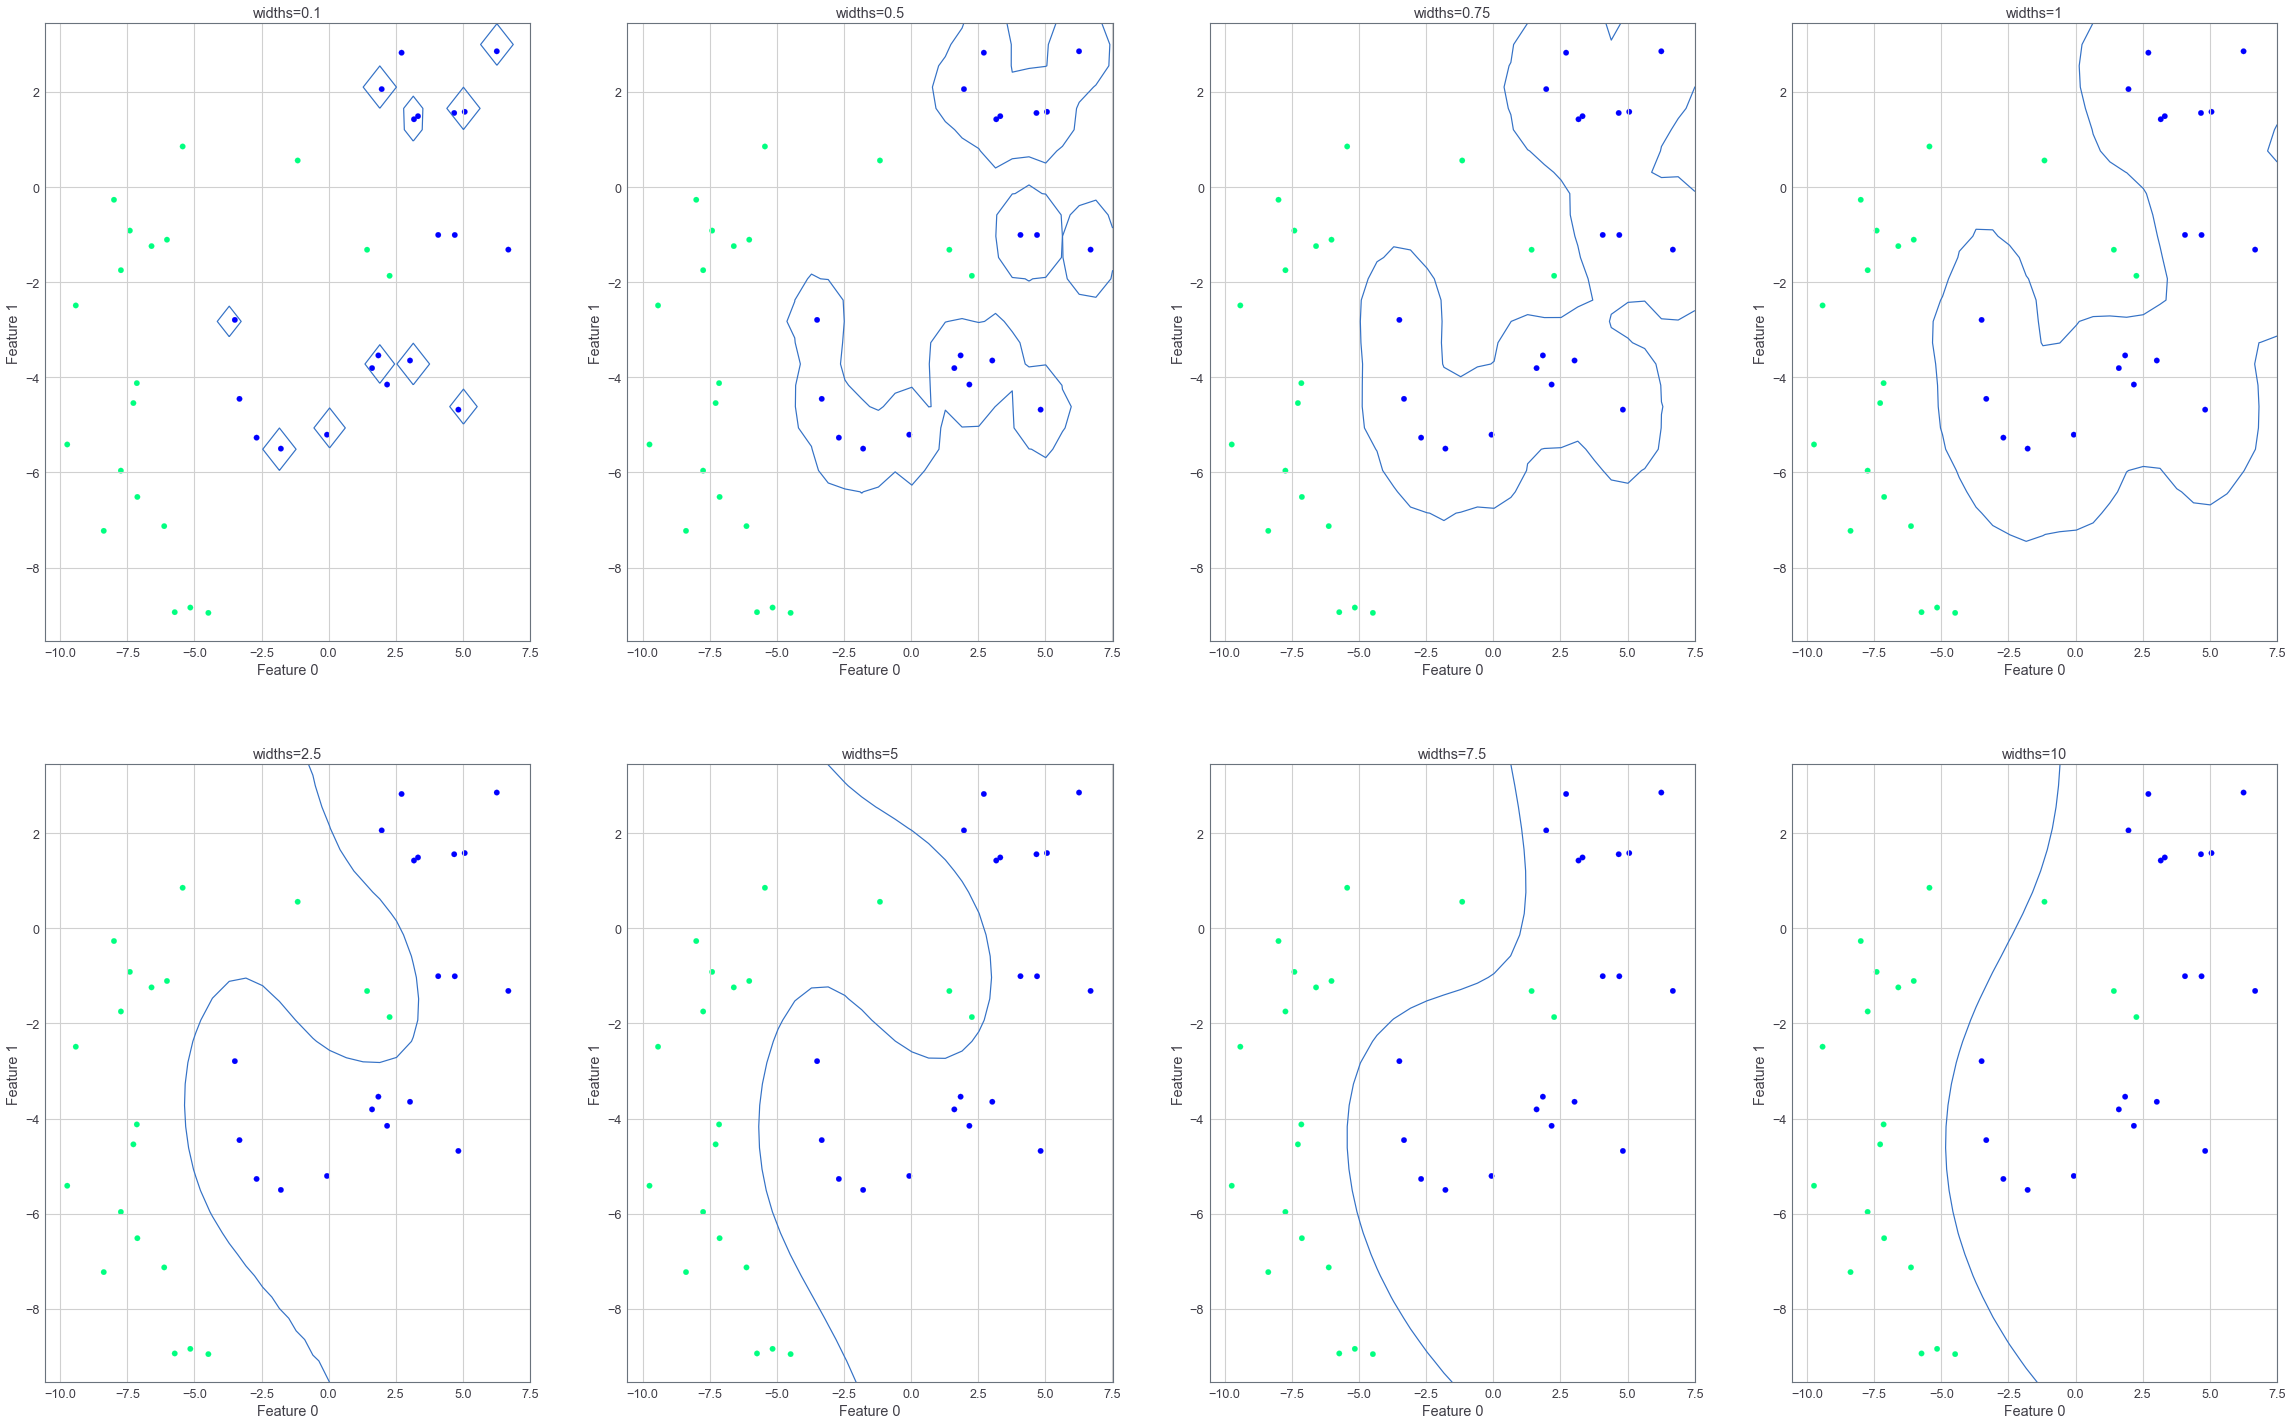

In [7]:
a = pr.gendatb(n=[20,20], s=1)

plt.figure(figsize=(40,25))
widths = [0.1, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
for i in range(len(widths)):
    svc = pr.svc(a, ("rbf", widths[i], 10))
    plt.subplot(2,4,i+1)
    pr.scatterd(a)
    pr.plotc(svc)
    plt.title("widths="+str(widths[i]))
plt.show()

(b)
<img src="./week4_figure/4-72.png" width="75%">
<img src="./week4_figure/2-110.png" width="75%">



(c)

For SVC, only the support vectors are taken into consideration. 

## Exercise 4.8

(a)

In [8]:
a = pr.gendatb(n=[200,200], s=1)
s = np.array([0.2,0.5,1.0,2.0,5.0,7.0,10.0,25.0])
e = np.zeros(len(s))

for i in range(len(s)):
    e[i] = pr.prcrossval(a, pr.svc([], ("rbf", s[i], 5)), k=10).mean()

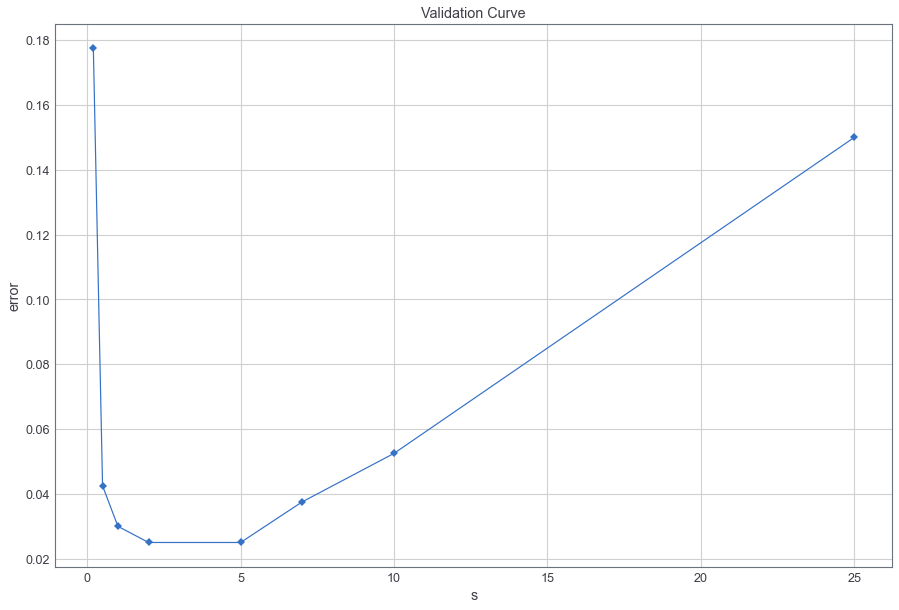

In [9]:
plt.figure(figsize=(15,10))
plt.plot(s, e, "-D")
plt.title("Validation Curve")
plt.xlabel("s")
plt.ylabel("error")
plt.show()

## Exercise 4.9

## Exercise 4.10

## Exercise 4.11

## Exercise 4.12